In [33]:
import pandas as pd

def read_csv(file_path, columns_to_take):
    print(f'Trying to read Columns: {columns_to_take} from history CSV {file_path}')
    data = pd.read_csv( file_path )[columns_to_take]
    return data

rates = read_csv("Rates_EURUSD_PERIOD_H1.csv", ['timestamp','open','high','low','close'])

Trying to read Columns: ['timestamp', 'open', 'high', 'low', 'close'] from history CSV Rates_EURUSD_PERIOD_H1.csv


In [42]:
rates['tsdiff'] = rates.timestamp.diff()/(60)
rates['hl_div2'] = (rates['high'] - rates['low']).div(2) + rates['low']

rates[rates.tsdiff >1].tail()

,timestamp,open,high,low,close,tsdiff,hl_div2
64950,1543604400,1.13212,1.13257,1.13109,1.13146,60.0,1.131830
64951,1543608000,1.13145,1.13154,1.13051,1.13143,60.0,1.131025
64952,1543611600,1.13142,1.13159,1.13084,1.13086,60.0,1.131215
64953,1543615200,1.13092,1.13214,1.13077,1.13212,60.0,1.131455
64954,1543618800,1.13212,1.13219,1.13129,1.13155,60.0,1.131740


In [43]:
[rates['tsdiff'].min(), rates['tsdiff'].max()]

[60.0, 8040.0]

In [60]:
from matplotlib import pyplot as plt
#tmp = rates[rates.tsdiff > 1 ]
#tmp = tmp[tmp.tsdiff < 13010 ].tsdiff
#
#plt.hist(tmp.tolist(), bins=100)
#plt.show()
#aggs = rates.groupby('tsdiff').size().reset_index(name='diff_count')
#aggs.tail(20)

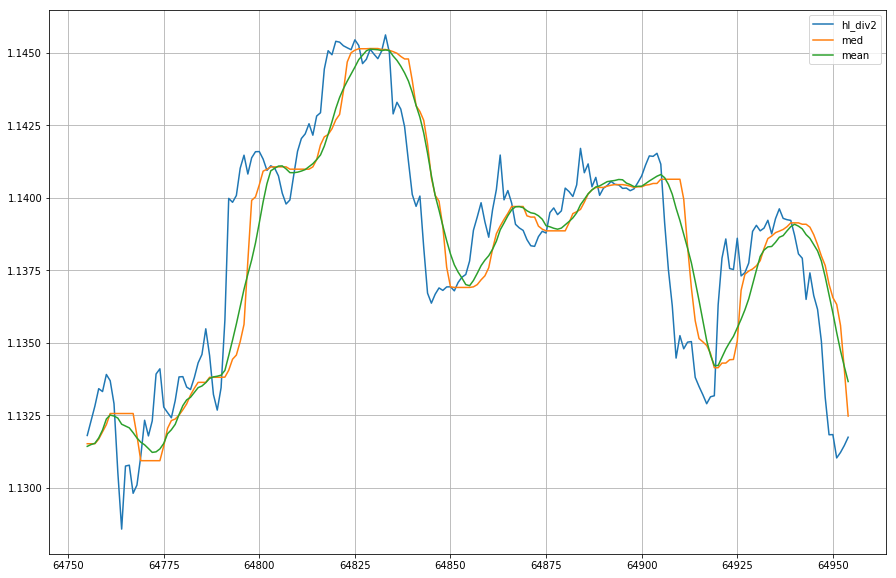

In [64]:
med_period = 12
mean_period = 12
med_mean_df = pd.DataFrame(rates['hl_div2'])
med_mean_df['med'] = rates.hl_div2.rolling(med_period).median()
med_mean_df['mean']= rates.hl_div2.rolling(mean_period).mean()

draw_df = med_mean_df.tail(200)
draw_df.plot(figsize=(15,10), grid=True)
plt.show()


In [79]:
df = rates.loc[0]
df

timestamp    1.212365e+09
open         1.556100e+00
high         1.556300e+00
low          1.554400e+00
close        1.556300e+00
tsdiff                NaN
hl_div2      1.555350e+00
Name: 0, dtype: float64

In [149]:
df = rates[['timestamp', 'high', 'low']]


def calc_delta_zz(df : pd.DataFrame, depth=0.3):
    '''Requires DataFrame containing columns called timestamp, high and low'''   

    #depth = 0.00300
    
    zzh = pd.Series(0. for _ in range(rates.__len__()))
    zzl = pd.Series(0. for _ in range(rates.__len__()))
    last_swing_size = df.high[0]-df.low[0]
    last = 0
    direction = 1
    for i in range(0, rates.__len__()-1):
        if direction > 0:
            if df.high[i]>zzh[last]:
                zzh[last]=0
                zzh[i]=df.high[i]
                last=i
            else:
                if df.low[i]<zzh[last]-last_swing_size*depth/100:
                    zzl[i]=df.low[i]
                    direction = -1
                    last_swing_size=zzh[last]-zzl[i]
                    last=i
        else:
            if df.low[i]<zzl[last]:
                zzl[last]=0
                zzl[i]=df.low[i]
                b4last=last
                last=i
            else:
                if df.high[i]>zzl[last]+last_swing_size*depth/100:
                    zzh[i]=df.high[i]
                    direction = 1
                    last_swing_size=zzh[i]-zzl[last]
                    last=i
    return zzh+zzl

df['zz'] = calc_delta_zz(df)
df[df.zz>0].tail(10)



C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py36\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,timestamp,high,low,zz
64931,1543536000,1.13928,1.13844,1.13844
64933,1543543200,1.13960,1.13885,1.13960
64934,1543546800,1.13906,1.13845,1.13845
64936,1543554000,1.14001,1.13923,1.14001
64943,1543579200,1.13727,1.13572,1.13572
64944,1543582800,1.13792,1.13690,1.13792
64949,1543600800,1.13262,1.13103,1.13103
64950,1543604400,1.13257,1.13109,1.13257
64951,1543608000,1.13154,1.13051,1.13051
64952,1543611600,1.13159,1.13084,1.13159


In [152]:
last_swing_size = df.high[0] - df.low[0]
last=0
direction=1

def calc_delta_zz_relative_v2(df: pd.DataFrame, depth=0.3, last_swing_size=0.0001, last=0, direction=1):
    '''Requires DataFrame containing columns called timestamp, high and low'''

    zzh = pd.Series( 0. for _ in range( df.__len__() ) )
    zzl = pd.Series( 0. for _ in range( df.__len__() ) )
    #last_swing_size = df.high[0] - df.low[0]
    #last = 0
    #direction = 1
    for i in range( 0, df.__len__() - 1 ):
        if direction > 0:
            if df.high[i] > zzh[last]:
                zzh[last] = 0
                zzh[i] = df.high[i]
                last = i
            else:
                if df.low[i] < zzh[last] - last_swing_size * depth / 100:
                    zzl[i] = df.low[i]
                    direction = -1
                    last_swing_size = zzh[last] - zzl[i]
                    last = i
        else:
            if df.low[i] < zzl[last]:
                zzl[last] = 0
                zzl[i] = df.low[i]
                last = i
            else:
                if df.high[i] > zzl[last] + last_swing_size * depth / 100:
                    zzh[i] = df.high[i]
                    direction = 1
                    last_swing_size = zzh[i] - zzl[last]
                    last = i
    return zzh + zzl

df['zz1'] = calc_delta_zz_relative_v2(df, 0.3, last_swing_size, last, direction)
df[df.zz1>0].tail(10)

last_swing_size
last

C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py36\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0

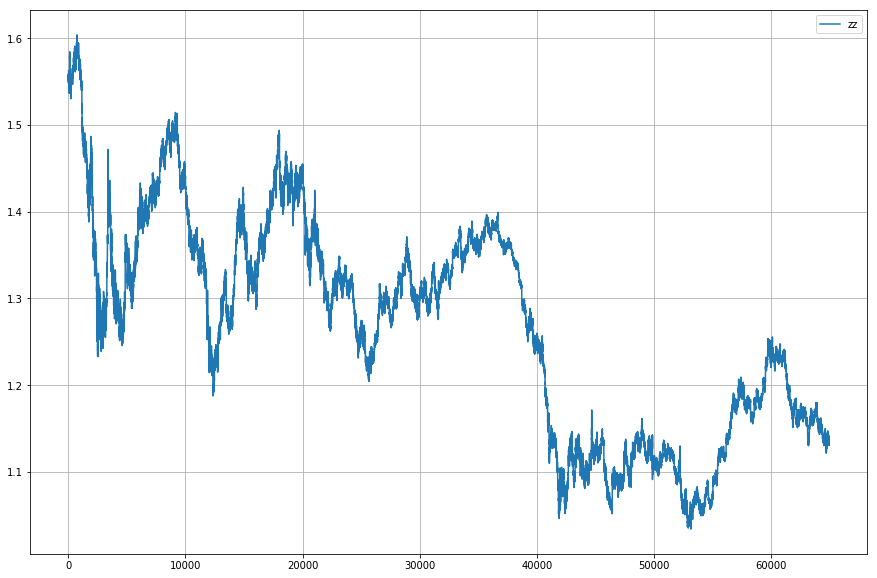

In [148]:
zzplot = pd.DataFrame(df.zz[df.zz>0])
zzplot.plot(figsize=(15,10), grid=True)
plt.show()